In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv('C:/Users/Abhi_Dell/Downloads/winequality-red.csv', sep=';')   #Data is from UCI Machine Learning Repository
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [21]:
# Now we need to find which features affect the 'wine-quality' the most
correlations = df.corr()['quality'].sort_values(ascending=False)
correlations

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [22]:
#So we see there is a strong positive correlation between 'alcohol' and 'quality'
# and a strong negative correlation between 'volatile acidity' and 'quality'

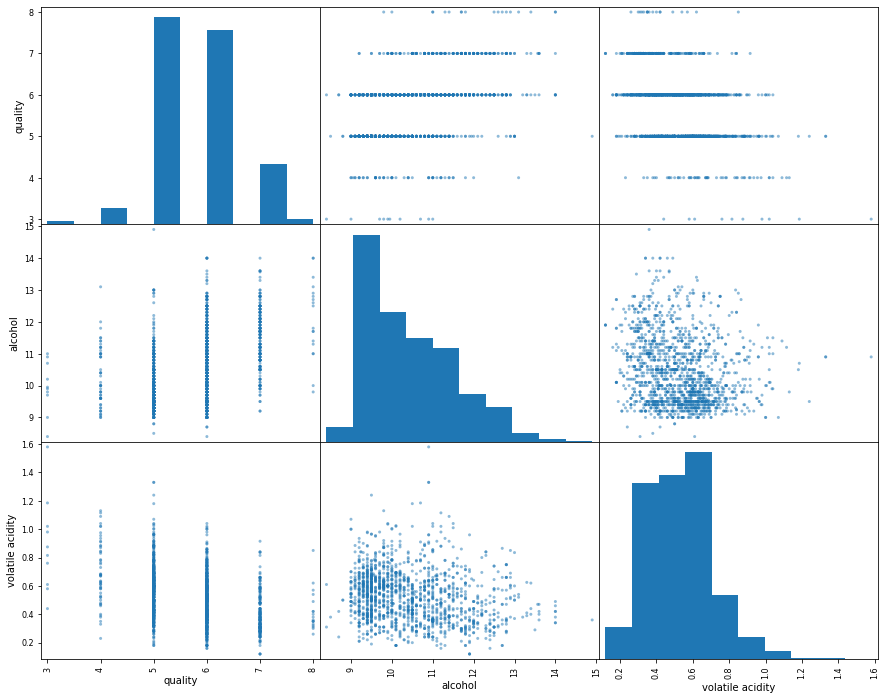

In [23]:
#Lets visualize the same
from pandas.plotting import scatter_matrix
attributes = ['quality', 'alcohol', 'volatile acidity']
scatter_matrix(df[attributes], figsize=(15,12));

In [32]:
#Selecting only the 2 features that affect our wine quality the most
X = df[['alcohol','volatile acidity']]    #Input Features
y = df['quality']                         #Target Data

In [34]:
X.head()

,alcohol,volatile acidity
0,9.4,0.70
1,9.8,0.88
2,9.8,0.76
3,9.8,0.28
4,9.4,0.70


In [35]:
X.shape

(1599, 2)

In [36]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [38]:
y.shape

(1599,)

In [40]:
#Now Using scikit-learn we'll predict the wine quality based on the the two features

from sklearn.model_selection import train_test_split                     #Spliting the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 2)
(320, 2)
(1279,)
(320,)


In [42]:
#Using Simple Linear Regression Model to perform prediction

from sklearn.linear_model import LinearRegression         
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print(linreg.intercept_)
print(linreg.coef_)

3.0364357312388406
[ 0.31527215 -1.31379845]


In [44]:
list(zip(['alcohol','volatile acidity'], linreg.coef_))

[('alcohol', 0.3152721529703392), ('volatile acidity', -1.3137984490461831)]

In [45]:
y_pred = linreg.predict(X_test)                     

In [46]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))       #Performing Root Mean Square Error Value to determine accuracy

0.6463405701395493


In [47]:
#An RMSerror of just approx 0.64 is very good. The closer the RMSE value is to Zero, the better is our model

In [49]:
linreg.predict([[10, 1]])   #Predicting wine quality for alcohol=10 and volatile acidity=1

array([4.87535881])

In [50]:
#So the predicted alcohol quality is 4.88 with RMSE=0.65. The mean alcohol quality is around 5.63. So the company should try to change the parameters to produce better quality wine.